In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
import libpysal as lps
import seaborn as sns
import libpysal as lps
import pysal as ps
from libpysal.weights import Queen, Rook, KNN
from shapely import wkt
from scipy.spatial import cKDTree
import sklearn.model_selection as model_select
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [2]:
pd.set_option('display.max_rows', 1000)

In [3]:
#barley residue
barley18=pd.read_csv("dataset/production/barley_2018.csv",usecols=["Area Code (FAO)","Barley_Residue"])

In [4]:
barley18_t=pd.read_csv("dataset/production/barley_2018_conti.csv",usecols=["Area","barley_residue_t"])

In [5]:
barley18_t.head()

Area  barley_residue_t
0            Africa      1.481655e+07
1  Northern America      2.051413e+07
2     South America      1.090386e+07
3              Asia      3.513985e+07
4            Europe      1.458965e+08

In [6]:
world_barley_residue=247490299

In [7]:
#read country code
country_code=pd.read_csv("dataset/country_data.csv",usecols=["Country Code","Country","ISO2 Code","ISO3 Code"])
country_code.head()

Country Code         Country ISO2 Code ISO3 Code
0             2     Afghanistan        AF       AFG
1          5100          Africa       NaN       X06
2             3         Albania        AL       ALB
3             4         Algeria        DZ       DZA
4             5  American Samoa        AS       ASM

In [8]:
#country area
area=pd.read_csv("dataset/cropland/country_area.csv",usecols=["country_area","ISO3 Code"])
area.head()

ISO3 Code  country_area
0       ABW         180.0
1       AFG      652860.0
2       AGO     1246700.0
3       ALB       28750.0
4       AND         470.0

In [9]:
#read shapefile
poly=gpd.read_file("dataset/wb_countries_admin0_10m/wb_countries_admin0_10m.shp")
poly.columns

Index(['OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN', 'FORMAL_FR',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2', 'ISO_A3',
       'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [10]:
poly

OBJECTID       featurecla  LEVEL               TYPE  \
0           1  Admin-0 country      2  Sovereign country   
1           2  Admin-0 country      2  Sovereign country   
2           3  Admin-0 country      2  Sovereign country   
3           4  Admin-0 country      2  Sovereign country   
4           5  Admin-0 country      2  Sovereign country   
5           6  Admin-0 country      2  Sovereign country   
6           7  Admin-0 country      2  Sovereign country   
7           8  Admin-0 country      2  Sovereign country   
8           9  Admin-0 country      2            Country   
9          10  Admin-0 country      2            Country   
10         11  Admin-0 country      2           Disputed   
11         12  Admin-0 country      2  Sovereign country   
12         13  Admin-0 country      2  Sovereign country   
13         14  Admin-0 country      2  Sovereign country   
14         15  Admin-0 country      2  Sovereign country   
15         16  Admin-0 country      2  Sovereign country   
16         17  Admin-0 country      2  Sovereign country   
17         18  Admin-0 country      2  Sovereign country   
18         19  Admin-0 country      2  Sovereign country   
19         20  Admin-0 country      2  Sovereign country   
20         21  Admin-0 country      2            Country   
21         22  Admin-0 country      2  Sovereign country   
22         23  Admin-0 country      2  Sovereign country   
23         24  Admin-0 country      2  Sovereign country   
24         25  Admin-0 country      2  Sovereign country   
25         26  Admin-0 country      2  Sovereign country   
26         27  Admin-0 country      2  Sovereign country   
27         28  Admin-0 country      2  Sovereign country   
28         29  Admin-0 country      2  Sovereign country   
29         30  Admin-0 country      2  Sovereign country   
30         31  Admin-0 country      2  Sovereign country   
31         32  Admin-0 country      2  Sovereign country   
32         33  Admin-0 country      2  Sovereign country   
33         34  Admin-0 country      2  Sovereign country   
34         35  Admin-0 country      2  Sovereign country   
35         36  Admin-0 country      2         Dependency   
36         37  Admin-0 country      2            Country   
37         38  Admin-0 country      2  Sovereign country   
38         39  Admin-0 country      2  Sovereign country   
39         40  Admin-0 country      2  Sovereign country   
40         41  Admin-0 country      2  Sovereign country   
41         42  Admin-0 country      2  Sovereign country   
42         43  Admin-0 country      2  Sovereign country   
43         44  Admin-0 country      2  Sovereign country   
44         45  Admin-0 country      2  Sovereign country   
45         46  Admin-0 country      2  Sovereign country   
46         47  Admin-0 country      2  Sovereign country   
47         48  Admin-0 country      2  Sovereign country   
48         49  Admin-0 country      2  Sovereign country   
49         50  Admin-0 country      2  Sovereign country   
50         51  Admin-0 country      2  Sovereign country   
51         52  Admin-0 country      2  Sovereign country   
52         53  Admin-0 country      2            Country   
53         54  Admin-0 country      2  Sovereign country   
54         55  Admin-0 country      2  Sovereign country   
55         56  Admin-0 country      2  Sovereign country   
56         57  Admin-0 country      2  Sovereign country   
57         58  Admin-0 country      2  Sovereign country   
58         59  Admin-0 country      2  Sovereign country   
59         60  Admin-0 country      2  Sovereign country   
60         61  Admin-0 country      2  Sovereign country   
61         62  Admin-0 country      2  Sovereign country   
62         63  Admin-0 country      2  Sovereign country   
63         64  Admin-0 country      2  Sovereign country   
64         65  Admin-0 country      2  Sovereign country   
65         66  Admin-0 country      2  Sovere

In [11]:
np.unique(poly["CONTINENT"])

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'Seven seas (open ocean)', 'South America'], dtype=object)

In [12]:
poly.loc[50,"ISO_A3_EH"]="NOR"

In [13]:
#merge country code and shapefile
country_poly=pd.merge(country_code,poly,left_on="ISO3 Code",right_on="ISO_A3_EH",how="inner")

In [14]:
country_poly

Country Code                                            Country  \
0               2                                        Afghanistan   
1               3                                            Albania   
2               4                                            Algeria   
3               5                                     American Samoa   
4               6                                            Andorra   
5               7                                             Angola   
6             258                                           Anguilla   
7               8                                Antigua and Barbuda   
8               9                                          Argentina   
9               1                                            Armenia   
10             22                                              Aruba   
11             10                                          Australia   
12             11                                            Austria   
13             52                                         Azerbaijan   
14             12                                            Bahamas   
15             13                                            Bahrain   
16             16                                         Bangladesh   
17             14                                           Barbados   
18             57                                            Belarus   
19            255                                            Belgium   
20             23                                             Belize   
21             53                                              Benin   
22             17                                            Bermuda   
23             18                                             Bhutan   
24             19                   Bolivia (Plurinational State of)   
25             80                             Bosnia and Herzegovina   
26             20                                           Botswana   
27             21                                             Brazil   
28            239                             British Virgin Islands   
29             26                                  Brunei Darussalam   
30             27                                           Bulgaria   
31            233                                       Burkina Faso   
32             29                                            Burundi   
33             35                                         Cabo Verde   
34            115                                           Cambodia   
35             32                                           Cameroon   
36             33                                             Canada   
37             36                                     Cayman Islands   
38             37                           Central African Republic   
39             39                                               Chad   
40             40                                              Chile   
41            351                                              China   
42             96                               China, Hong Kong SAR   
43            128                                   China, Macao SAR   
44             44                                           Colombia   
45             45                                            Comoros   
46             46                                              Congo   
47             47                                       Cook Islands   
48             48                                         Costa Rica   
49            107                                      Côte d'Ivoire   
50             98                                            Croatia   
51             49                                               Cuba   
52             50                                             Cyprus   
53            167                                            Czechia   
54            116              Democratic Peo

In [15]:
country_poly1=pd.merge(country_poly,area,on="ISO3 Code",how="outer")
country_poly1

Country Code                                            Country  \
0               2                                        Afghanistan   
1               3                                            Albania   
2               4                                            Algeria   
3               5                                     American Samoa   
4               6                                            Andorra   
5               7                                             Angola   
6             258                                           Anguilla   
7               8                                Antigua and Barbuda   
8               9                                          Argentina   
9               1                                            Armenia   
10             22                                              Aruba   
11             10                                          Australia   
12             11                                            Austria   
13             52                                         Azerbaijan   
14             12                                            Bahamas   
15             13                                            Bahrain   
16             16                                         Bangladesh   
17             14                                           Barbados   
18             57                                            Belarus   
19            255                                            Belgium   
20             23                                             Belize   
21             53                                              Benin   
22             17                                            Bermuda   
23             18                                             Bhutan   
24             19                   Bolivia (Plurinational State of)   
25             80                             Bosnia and Herzegovina   
26             20                                           Botswana   
27             21                                             Brazil   
28            239                             British Virgin Islands   
29             26                                  Brunei Darussalam   
30             27                                           Bulgaria   
31            233                                       Burkina Faso   
32             29                                            Burundi   
33             35                                         Cabo Verde   
34            115                                           Cambodia   
35             32                                           Cameroon   
36             33                                             Canada   
37             36                                     Cayman Islands   
38             37                           Central African Republic   
39             39                                               Chad   
40             40                                              Chile   
41            351                                              China   
42             96                               China, Hong Kong SAR   
43            128                                   China, Macao SAR   
44             44                                           Colombia   
45             45                                            Comoros   
46             46                                              Congo   
47             47                                       Cook Islands   
48             48                                         Costa Rica   
49            107                                      Côte d'Ivoire   
50             98                                            Croatia   
51             49                                               Cuba   
52             50                                             Cyprus   
53            167                                            Czechia   
54            116              Democratic Peo

In [16]:
#select columns
country_poly1=pd.DataFrame(country_poly1,columns=["Country Code","Country","geometry","CONTINENT","country_area"])
country_poly1#["Country Code"]==np.NaN

Country Code                                            Country  \
0               2                                        Afghanistan   
1               3                                            Albania   
2               4                                            Algeria   
3               5                                     American Samoa   
4               6                                            Andorra   
5               7                                             Angola   
6             258                                           Anguilla   
7               8                                Antigua and Barbuda   
8               9                                          Argentina   
9               1                                            Armenia   
10             22                                              Aruba   
11             10                                          Australia   
12             11                                            Austria   
13             52                                         Azerbaijan   
14             12                                            Bahamas   
15             13                                            Bahrain   
16             16                                         Bangladesh   
17             14                                           Barbados   
18             57                                            Belarus   
19            255                                            Belgium   
20             23                                             Belize   
21             53                                              Benin   
22             17                                            Bermuda   
23             18                                             Bhutan   
24             19                   Bolivia (Plurinational State of)   
25             80                             Bosnia and Herzegovina   
26             20                                           Botswana   
27             21                                             Brazil   
28            239                             British Virgin Islands   
29             26                                  Brunei Darussalam   
30             27                                           Bulgaria   
31            233                                       Burkina Faso   
32             29                                            Burundi   
33             35                                         Cabo Verde   
34            115                                           Cambodia   
35             32                                           Cameroon   
36             33                                             Canada   
37             36                                     Cayman Islands   
38             37                           Central African Republic   
39             39                                               Chad   
40             40                                              Chile   
41            351                                              China   
42             96                               China, Hong Kong SAR   
43            128                                   China, Macao SAR   
44             44                                           Colombia   
45             45                                            Comoros   
46             46                                              Congo   
47             47                                       Cook Islands   
48             48                                         Costa Rica   
49            107                                      Côte d'Ivoire   
50             98                                            Croatia   
51             49                                               Cuba   
52             50                                             Cyprus   
53            167                                            Czechia   
54            116              Democratic Peo

In [17]:
# merge barley and country polygon data
barley18_g=pd.merge(country_poly1,barley18,left_on="Country Code",right_on="Area Code (FAO)",how="outer")
barley18_g

Country Code                                            Country  \
0               2                                        Afghanistan   
1               3                                            Albania   
2               4                                            Algeria   
3               5                                     American Samoa   
4               6                                            Andorra   
5               7                                             Angola   
6             258                                           Anguilla   
7               8                                Antigua and Barbuda   
8               9                                          Argentina   
9               1                                            Armenia   
10             22                                              Aruba   
11             10                                          Australia   
12             11                                            Austria   
13             52                                         Azerbaijan   
14             12                                            Bahamas   
15             13                                            Bahrain   
16             16                                         Bangladesh   
17             14                                           Barbados   
18             57                                            Belarus   
19            255                                            Belgium   
20             23                                             Belize   
21             53                                              Benin   
22             17                                            Bermuda   
23             18                                             Bhutan   
24             19                   Bolivia (Plurinational State of)   
25             80                             Bosnia and Herzegovina   
26             20                                           Botswana   
27             21                                             Brazil   
28            239                             British Virgin Islands   
29             26                                  Brunei Darussalam   
30             27                                           Bulgaria   
31            233                                       Burkina Faso   
32             29                                            Burundi   
33             35                                         Cabo Verde   
34            115                                           Cambodia   
35             32                                           Cameroon   
36             33                                             Canada   
37             36                                     Cayman Islands   
38             37                           Central African Republic   
39             39                                               Chad   
40             40                                              Chile   
41            351                                              China   
42             96                               China, Hong Kong SAR   
43            128                                   China, Macao SAR   
44             44                                           Colombia   
45             45                                            Comoros   
46             46                                              Congo   
47             47                                       Cook Islands   
48             48                                         Costa Rica   
49            107                                      Côte d'Ivoire   
50             98                                            Croatia   
51             49                                               Cuba   
52             50                                             Cyprus   
53            167                                            Czechia   
54            116              Democratic Peo

In [18]:
missing_num_africa=len(barley18_g[(barley18_g["CONTINENT"]=="Africa") & (np.isnan(barley18_g["Barley_Residue"].values))])

In [19]:
#get average value to fill missing data
ave_af=float((barley18_t[barley18_t["Area"]=="Africa"]["barley_residue_t"]-(barley18_g[(barley18_g["CONTINENT"]=="Africa") & (np.isfinite(barley18_g["Barley_Residue"].values))]["Barley_Residue"].sum()))/missing_num_africa)
ave_af

36325.60135135135

In [20]:
barley18_g.loc[(barley18_g["CONTINENT"]=="Africa") & (np.isnan(barley18_g["Barley_Residue"].values)),["Barley_Residue"]]=ave_af

In [21]:
len(barley18_g[(barley18_g["CONTINENT"]=="Africa") & (np.isnan(barley18_g["Barley_Residue"].values))])

0

In [22]:
# Create the spatial weights matrix
w_queen = Queen.from_dataframe(barley18_g)

C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 72 disconnected components.
 There are 69 islands with ids: 3, 6, 7, 10, 11, 14, 15, 17, 22, 28, 33, 37, 43, 45, 47, 51, 52, 58, 68, 69, 70, 73, 81, 82, 83, 92, 98, 101, 102, 106, 118, 121, 123, 124, 126, 128, 132, 137, 139, 140, 141, 143, 144, 145, 149, 150, 152, 156, 162, 163, 166, 173, 174, 175, 176, 177, 178, 180, 184, 186, 189, 194, 204, 205, 209, 210, 217, 220, 223.
  warnings.warn(message)


In [23]:
#using nearest neighbor to fill missing values outside Africa
missing_index=barley18_g[np.isnan(barley18_g["Barley_Residue"].values)].index

In [24]:
for i in missing_index:  
    target_polygon = [i]
    target_polygon.extend(w_queen.neighbors[i])
    barley18_g.loc[i,"Barley_Residue"]=barley18_g.loc[target_polygon]["Barley_Residue"].mean()

In [25]:
barley18_g["centroid"]=barley18_g["geometry"].values.centroid

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3254: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (await self.run_code(code, result,  async_=asy)):


In [26]:
missing_index1=barley18_g[np.isnan(barley18_g["Barley_Residue"].values)].index

In [27]:
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([barley18_g.loc[i,"centroid"].x,barley18_g.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=4)
        sum_r=0
        k=0
        for j in idx:
            if not np.isnan(barley18_g.loc[j,"Barley_Residue"]):
                k=k+1
                sum_r=sum_r+barley18_g.loc[j,"Barley_Residue"]
        if k!=0:
            a_sum=sum_r/k
            barley18_g.loc[i,"Barley_Residue"]=a_sum

while len(barley18_g[np.isnan(barley18_g["Barley_Residue"].values)].index)!=0:
    ckdnearest(barley18_g,barley18_g[np.isnan(barley18_g["Barley_Residue"].values)].index)

In [28]:
len(barley18_g[np.isnan(barley18_g["Barley_Residue"].values)])

0

In [29]:
barley18_g=gpd.GeoDataFrame(barley18_g)

Text(0.5, 1, 'Barley Residues (2018)')

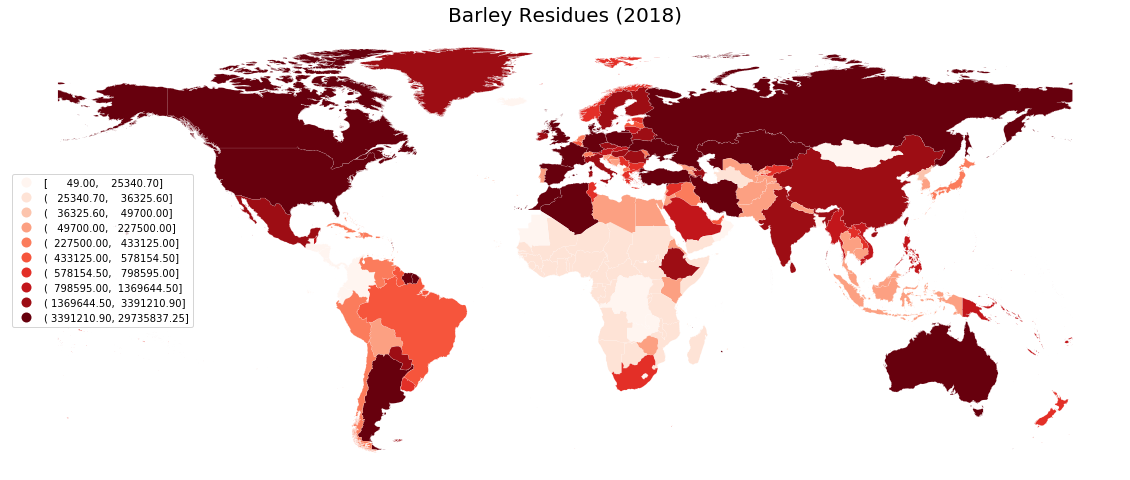

In [30]:
#visualize
fig, ax = plt.subplots(figsize=(20, 15))
#barley17_g.plot(column='barley_value', missing_kwds={'color': 'lightgrey'})
barley18_g.plot(column='Barley_Residue',scheme='quantiles',k=10, 
         cmap=plt.cm.Reds, alpha=1, legend=True,legend_kwds=dict(loc='center left'),
         edgecolor='w', linewidth=0.1,ax=ax,
               
       )
ax.set_axis_off()
ax.set_title("Barley Residues (2018)", fontsize=20)

In [31]:
barley18_g["Area Code (FAO)"]=barley18_g["Country Code"]
barley18_g

Country Code                                            Country  \
0               2                                        Afghanistan   
1               3                                            Albania   
2               4                                            Algeria   
3               5                                     American Samoa   
4               6                                            Andorra   
5               7                                             Angola   
6             258                                           Anguilla   
7               8                                Antigua and Barbuda   
8               9                                          Argentina   
9               1                                            Armenia   
10             22                                              Aruba   
11             10                                          Australia   
12             11                                            Austria   
13             52                                         Azerbaijan   
14             12                                            Bahamas   
15             13                                            Bahrain   
16             16                                         Bangladesh   
17             14                                           Barbados   
18             57                                            Belarus   
19            255                                            Belgium   
20             23                                             Belize   
21             53                                              Benin   
22             17                                            Bermuda   
23             18                                             Bhutan   
24             19                   Bolivia (Plurinational State of)   
25             80                             Bosnia and Herzegovina   
26             20                                           Botswana   
27             21                                             Brazil   
28            239                             British Virgin Islands   
29             26                                  Brunei Darussalam   
30             27                                           Bulgaria   
31            233                                       Burkina Faso   
32             29                                            Burundi   
33             35                                         Cabo Verde   
34            115                                           Cambodia   
35             32                                           Cameroon   
36             33                                             Canada   
37             36                                     Cayman Islands   
38             37                           Central African Republic   
39             39                                               Chad   
40             40                                              Chile   
41            351                                              China   
42             96                               China, Hong Kong SAR   
43            128                                   China, Macao SAR   
44             44                                           Colombia   
45             45                                            Comoros   
46             46                                              Congo   
47             47                                       Cook Islands   
48             48                                         Costa Rica   
49            107                                      Côte d'Ivoire   
50             98                                            Croatia   
51             49                                               Cuba   
52             50                                             Cyprus   
53            167                                            Czechia   
54            116              Democratic Peo

In [32]:
#do spatial analysis
#global spatial analysis
barley18_gs=barley18_g
barley_binary=[]
for i in range(0,barley18_gs.shape[0]):
    barley_binary.append(barley18_gs.loc[i,'Barley_Residue']> barley18_gs['Barley_Residue'].median())

In [33]:
labels = ['Low value', 'High value']
barley_binary= [labels[i] for i in 1*barley_binary] 
barley18_gs['barley_binary'] = barley_binary

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


Text(0.5, 1, 'High and Low Values of Barley Residues (2018)')

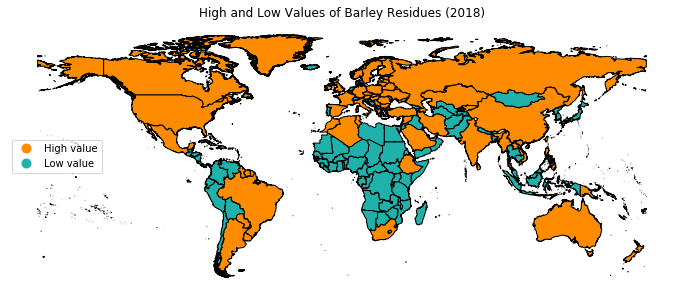

In [34]:
#visualize high and low values
from matplotlib import colors
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
cmap = colors.ListedColormap(['darkorange', 'lightseagreen'])  #cmap='binary_r
barley18_gs.plot(column='barley_binary', cmap=cmap ,edgecolor='black', legend=True,legend_kwds=dict(loc='center left'), ax=ax)
ax.set_axis_off()
ax.set_title("High and Low Values of Barley Residues (2018)")

In [35]:
from pysal.explore import esda 
barley_18gx_binary = 1 * (barley18_gs['Barley_Residue']>barley18_gs['Barley_Residue'].median()) # convert back to binary
barley_W_queen = lps.weights.Queen.from_dataframe(barley18_gs)
barley_W_queen.transform = 'b'
#np.random.seed(12345) 
barley_jc = esda.join_counts.Join_Counts(barley_18gx_binary,barley_W_queen)

C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 72 disconnected components.
 There are 69 islands with ids: 3, 6, 7, 10, 11, 14, 15, 17, 22, 28, 33, 37, 43, 45, 47, 51, 52, 58, 68, 69, 70, 73, 81, 82, 83, 92, 98, 101, 102, 106, 118, 121, 123, 124, 126, 128, 132, 137, 139, 140, 141, 143, 144, 145, 149, 150, 152, 156, 162, 163, 166, 173, 174, 175, 176, 177, 178, 180, 184, 186, 189, 194, 204, 205, 209, 210, 217, 220, 223.
  warnings.warn(message)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('W

Text(0.5, 0, "Moran's I")

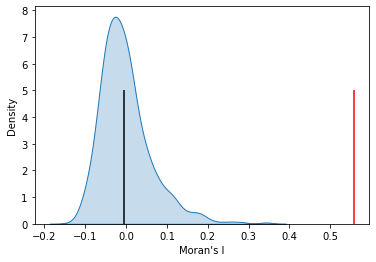

In [36]:
barley_mi = esda.moran.Moran(barley18_gs['Barley_Residue'], barley_W_queen)
sns.kdeplot(barley_mi.sim, shade=True)
plt.vlines(barley_mi.I, 0, 5, color='r')
plt.vlines(barley_mi.EI, 0, 5)
plt.xlabel("Moran's I")

In [37]:
# Check the statistical significance
barley_mi.p_sim

0.001

In [38]:
barley_w_queen = Queen.from_dataframe(barley18_gs)

C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 72 disconnected components.
 There are 69 islands with ids: 3, 6, 7, 10, 11, 14, 15, 17, 22, 28, 33, 37, 43, 45, 47, 51, 52, 58, 68, 69, 70, 73, 81, 82, 83, 92, 98, 101, 102, 106, 118, 121, 123, 124, 126, 128, 132, 137, 139, 140, 141, 143, 144, 145, 149, 150, 152, 156, 162, 163, 166, 173, 174, 175, 176, 177, 178, 180, 184, 186, 189, 194, 204, 205, 209, 210, 217, 220, 223.
  warnings.warn(message)


In [39]:
I_price = ps.explore.esda.Moran(barley18_gs['Barley_Residue'].values, barley_w_queen)  # Moran's I
I_price.I, I_price.p_sim 

('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('W

(0.5587377458212109, 0.001)

In [40]:
barley_lisa = ps.explore.esda.Moran_Local(barley18_gs['Barley_Residue'].values, barley_W_queen, permutations=999)
#barley_lisa.Is

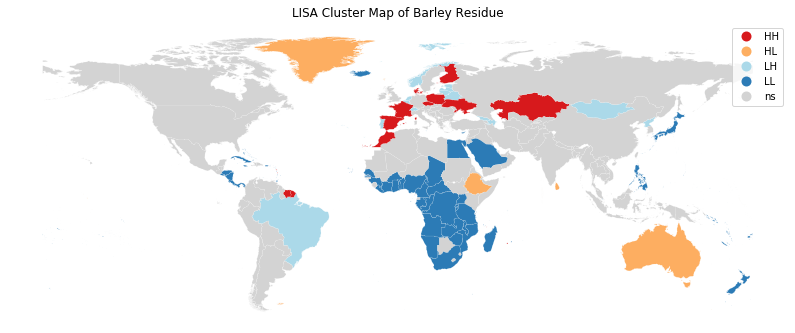

In [41]:
from pysal.viz.splot.esda import lisa_cluster
fig, ax=plt.subplots(1, figsize=(14,10))
fig = lisa_cluster(barley_lisa,barley18_gs, ax=ax)
plt.title("LISA Cluster Map of Barley Residue")
plt.show() 

In [42]:
#do prediction 
#read fertilizer csv 
fertilizers_18=pd.read_csv("dataset/fertilizer/synthetic_fertilizers_per_area_2018.csv",usecols=["Area Code (FAO)","Ferti_Value"])

In [43]:
#merge data
barley18_g1=pd.merge(barley18_g,fertilizers_18,on="Area Code (FAO)",how="outer")
barley18_g1["Area Code (FAO)"]=barley18_g1["Country Code"]

In [44]:
#fill fertilizer missing values 
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([gdA.loc[i,"centroid"].x,gdA.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=4)
        sum_r=0
        k=0
        for j in idx:
            if not np.isnan(gdA.loc[j,"Ferti_Value"]):
                k=k+1
                sum_r=sum_r+gdA.loc[j,"Ferti_Value"]
        if k!=0:
            a_sum=sum_r/k
            gdA.loc[i,"Ferti_Value"]=a_sum
while len(barley18_g1[np.isnan(barley18_g1["Ferti_Value"].values)].index)!=0:
    ckdnearest(barley18_g1,barley18_g1[np.isnan(barley18_g1["Ferti_Value"].values)].index)

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
barley18_g1

Country Code                                            Country  \
0               2                                        Afghanistan   
1               3                                            Albania   
2               4                                            Algeria   
3               5                                     American Samoa   
4               6                                            Andorra   
5               7                                             Angola   
6             258                                           Anguilla   
7               8                                Antigua and Barbuda   
8               9                                          Argentina   
9               1                                            Armenia   
10             22                                              Aruba   
11             10                                          Australia   
12             11                                            Austria   
13             52                                         Azerbaijan   
14             12                                            Bahamas   
15             13                                            Bahrain   
16             16                                         Bangladesh   
17             14                                           Barbados   
18             57                                            Belarus   
19            255                                            Belgium   
20             23                                             Belize   
21             53                                              Benin   
22             17                                            Bermuda   
23             18                                             Bhutan   
24             19                   Bolivia (Plurinational State of)   
25             80                             Bosnia and Herzegovina   
26             20                                           Botswana   
27             21                                             Brazil   
28            239                             British Virgin Islands   
29             26                                  Brunei Darussalam   
30             27                                           Bulgaria   
31            233                                       Burkina Faso   
32             29                                            Burundi   
33             35                                         Cabo Verde   
34            115                                           Cambodia   
35             32                                           Cameroon   
36             33                                             Canada   
37             36                                     Cayman Islands   
38             37                           Central African Republic   
39             39                                               Chad   
40             40                                              Chile   
41            351                                              China   
42             96                               China, Hong Kong SAR   
43            128                                   China, Macao SAR   
44             44                                           Colombia   
45             45                                            Comoros   
46             46                                              Congo   
47             47                                       Cook Islands   
48             48                                         Costa Rica   
49            107                                      Côte d'Ivoire   
50             98                                            Croatia   
51             49                                               Cuba   
52             50                                             Cyprus   
53            167                                            Czechia   
54            116              Democratic Peo

In [46]:
#read csv 
cropland_18=pd.read_csv("dataset/cropland/crop_land_2018.csv",usecols=["Area Code (FAO)","Land_Value"])
cropland_18.head()

Area Code (FAO)  Land_Value
0                3   3050.6290
1                7   5471.1183
2                9  27913.0415
3               10  52921.9173
4               11   2626.2094

In [47]:
barley18_g2=pd.merge(barley18_g1,cropland_18,on="Area Code (FAO)",how="outer")

In [48]:
barley18_g2

Country Code                                            Country  \
0               2                                        Afghanistan   
1               3                                            Albania   
2               4                                            Algeria   
3               5                                     American Samoa   
4               6                                            Andorra   
5               7                                             Angola   
6             258                                           Anguilla   
7               8                                Antigua and Barbuda   
8               9                                          Argentina   
9               1                                            Armenia   
10             22                                              Aruba   
11             10                                          Australia   
12             11                                            Austria   
13             52                                         Azerbaijan   
14             12                                            Bahamas   
15             13                                            Bahrain   
16             16                                         Bangladesh   
17             14                                           Barbados   
18             57                                            Belarus   
19            255                                            Belgium   
20             23                                             Belize   
21             53                                              Benin   
22             17                                            Bermuda   
23             18                                             Bhutan   
24             19                   Bolivia (Plurinational State of)   
25             80                             Bosnia and Herzegovina   
26             20                                           Botswana   
27             21                                             Brazil   
28            239                             British Virgin Islands   
29             26                                  Brunei Darussalam   
30             27                                           Bulgaria   
31            233                                       Burkina Faso   
32             29                                            Burundi   
33             35                                         Cabo Verde   
34            115                                           Cambodia   
35             32                                           Cameroon   
36             33                                             Canada   
37             36                                     Cayman Islands   
38             37                           Central African Republic   
39             39                                               Chad   
40             40                                              Chile   
41            351                                              China   
42             96                               China, Hong Kong SAR   
43            128                                   China, Macao SAR   
44             44                                           Colombia   
45             45                                            Comoros   
46             46                                              Congo   
47             47                                       Cook Islands   
48             48                                         Costa Rica   
49            107                                      Côte d'Ivoire   
50             98                                            Croatia   
51             49                                               Cuba   
52             50                                             Cyprus   
53            167                                            Czechia   
54            116              Democratic Peo

In [49]:
missing_index3=barley18_g2[np.isnan(barley18_g2["Land_Value"].values)].index

In [50]:
#fill crop land missing values 
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([gdA.loc[i,"centroid"].x,gdA.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=5)
        land_sum=0
        area_sum=0
        k=0
        for j in idx:
            if not np.isnan(gdA.loc[j,"Land_Value"]):
                land_sum=land_sum+gdA.loc[j,"Land_Value"]
                area_sum=area_sum+gdA.loc[j,"country_area"]
                k=k+1
        if k!=0:
            gdA.loc[i,"Land_Value"]=(land_sum/area_sum)*gdA.loc[i,"country_area"]
while len(barley18_g2[np.isnan(barley18_g2["Land_Value"].values)].index)!=0:
    ckdnearest(barley18_g2,barley18_g2[np.isnan(barley18_g2["Land_Value"].values)].index)

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from th

In [51]:
barley18_g2

Country Code                                            Country  \
0               2                                        Afghanistan   
1               3                                            Albania   
2               4                                            Algeria   
3               5                                     American Samoa   
4               6                                            Andorra   
5               7                                             Angola   
6             258                                           Anguilla   
7               8                                Antigua and Barbuda   
8               9                                          Argentina   
9               1                                            Armenia   
10             22                                              Aruba   
11             10                                          Australia   
12             11                                            Austria   
13             52                                         Azerbaijan   
14             12                                            Bahamas   
15             13                                            Bahrain   
16             16                                         Bangladesh   
17             14                                           Barbados   
18             57                                            Belarus   
19            255                                            Belgium   
20             23                                             Belize   
21             53                                              Benin   
22             17                                            Bermuda   
23             18                                             Bhutan   
24             19                   Bolivia (Plurinational State of)   
25             80                             Bosnia and Herzegovina   
26             20                                           Botswana   
27             21                                             Brazil   
28            239                             British Virgin Islands   
29             26                                  Brunei Darussalam   
30             27                                           Bulgaria   
31            233                                       Burkina Faso   
32             29                                            Burundi   
33             35                                         Cabo Verde   
34            115                                           Cambodia   
35             32                                           Cameroon   
36             33                                             Canada   
37             36                                     Cayman Islands   
38             37                           Central African Republic   
39             39                                               Chad   
40             40                                              Chile   
41            351                                              China   
42             96                               China, Hong Kong SAR   
43            128                                   China, Macao SAR   
44             44                                           Colombia   
45             45                                            Comoros   
46             46                                              Congo   
47             47                                       Cook Islands   
48             48                                         Costa Rica   
49            107                                      Côte d'Ivoire   
50             98                                            Croatia   
51             49                                               Cuba   
52             50                                             Cyprus   
53            167                                            Czechia   
54            116              Democratic Peo

In [52]:
#read climate data
temperature_18=pd.read_csv("dataset/climate/climate18.csv",usecols=["temperature_median","temperature_max","temperature_min","Country Code"])
temperature_18.head()

temperature_median  temperature_max  temperature_min  Country Code
0              26.880            30.82            15.20         101.0
1              26.190            28.62            21.06         131.0
2               6.575            28.51           -11.78          40.0
3              25.360            32.75           -12.02          19.0
4              24.855            37.17             0.07         170.0

In [53]:
barley18_g3=pd.merge(barley18_g2,temperature_18,on="Country Code",how="outer")
barley18_g3=barley18_g3.drop([227,228,229,230])
barley18_g3

Country Code                                            Country  \
0             2.0                                        Afghanistan   
1             3.0                                            Albania   
2             4.0                                            Algeria   
3             5.0                                     American Samoa   
4             6.0                                            Andorra   
5             7.0                                             Angola   
6           258.0                                           Anguilla   
7             8.0                                Antigua and Barbuda   
8             9.0                                          Argentina   
9             1.0                                            Armenia   
10           22.0                                              Aruba   
11           10.0                                          Australia   
12           11.0                                            Austria   
13           52.0                                         Azerbaijan   
14           12.0                                            Bahamas   
15           13.0                                            Bahrain   
16           16.0                                         Bangladesh   
17           14.0                                           Barbados   
18           57.0                                            Belarus   
19          255.0                                            Belgium   
20           23.0                                             Belize   
21           53.0                                              Benin   
22           17.0                                            Bermuda   
23           18.0                                             Bhutan   
24           19.0                   Bolivia (Plurinational State of)   
25           80.0                             Bosnia and Herzegovina   
26           20.0                                           Botswana   
27           21.0                                             Brazil   
28          239.0                             British Virgin Islands   
29           26.0                                  Brunei Darussalam   
30           27.0                                           Bulgaria   
31          233.0                                       Burkina Faso   
32           29.0                                            Burundi   
33           35.0                                         Cabo Verde   
34          115.0                                           Cambodia   
35           32.0                                           Cameroon   
36           33.0                                             Canada   
37           36.0                                     Cayman Islands   
38           37.0                           Central African Republic   
39           39.0                                               Chad   
40           40.0                                              Chile   
41          351.0                                              China   
42           96.0                               China, Hong Kong SAR   
43          128.0                                   China, Macao SAR   
44           44.0                                           Colombia   
45           45.0                                            Comoros   
46           46.0                                              Congo   
47           47.0                                       Cook Islands   
48           48.0                                         Costa Rica   
49          107.0                                      Côte d'Ivoire   
50           98.0                                            Croatia   
51           49.0                                               Cuba   
52           50.0                                             Cyprus   
53          167.0                                            Czechia   
54          116.0              Democratic Peo

In [54]:
#fill temperature missing values median
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([gdA.loc[i,"centroid"].x,gdA.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=4)
        t_sum=0
        k=0
        for j in idx:
            if not np.isnan(gdA.loc[j,"temperature_median"]):
                k=k+1
                t_sum=t_sum+gdA.loc[j,"temperature_median"]
        if k!=0:
            a_sum=t_sum/k
            gdA.loc[i,"temperature_median"]=a_sum
            
while len(barley18_g3[np.isnan(barley18_g3["temperature_median"].values)].index)!=0:
    ckdnearest(barley18_g3,barley18_g3[np.isnan(barley18_g3["temperature_median"].values)].index)

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
#fill temperature missing values max
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([gdA.loc[i,"centroid"].x,gdA.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=4)
        t_sum=0
        k=0
        for j in idx:
            if not np.isnan(gdA.loc[j,"temperature_max"]):
                k=k+1
                t_sum=t_sum+gdA.loc[j,"temperature_max"]
        if k!=0:
            a_sum=t_sum/k
            gdA.loc[i,"temperature_max"]=a_sum
            
while len(barley18_g3[np.isnan(barley18_g3["temperature_max"].values)].index)!=0:
    ckdnearest(barley18_g3,barley18_g3[np.isnan(barley18_g3["temperature_max"].values)].index)

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
#fill temperature missing values min
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([gdA.loc[i,"centroid"].x,gdA.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=4)
        t_sum=0
        k=0
        for j in idx:
            if not np.isnan(gdA.loc[j,"temperature_min"]):
                k=k+1
                t_sum=t_sum+gdA.loc[j,"temperature_min"]
        if k!=0:
            a_sum=t_sum/k
            gdA.loc[i,"temperature_min"]=a_sum
            
while len(barley18_g3[np.isnan(barley18_g3["temperature_min"].values)].index)!=0:
    ckdnearest(barley18_g3,barley18_g3[np.isnan(barley18_g3["temperature_min"].values)].index)

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
barley18_g3

Country Code                                            Country  \
0             2.0                                        Afghanistan   
1             3.0                                            Albania   
2             4.0                                            Algeria   
3             5.0                                     American Samoa   
4             6.0                                            Andorra   
5             7.0                                             Angola   
6           258.0                                           Anguilla   
7             8.0                                Antigua and Barbuda   
8             9.0                                          Argentina   
9             1.0                                            Armenia   
10           22.0                                              Aruba   
11           10.0                                          Australia   
12           11.0                                            Austria   
13           52.0                                         Azerbaijan   
14           12.0                                            Bahamas   
15           13.0                                            Bahrain   
16           16.0                                         Bangladesh   
17           14.0                                           Barbados   
18           57.0                                            Belarus   
19          255.0                                            Belgium   
20           23.0                                             Belize   
21           53.0                                              Benin   
22           17.0                                            Bermuda   
23           18.0                                             Bhutan   
24           19.0                   Bolivia (Plurinational State of)   
25           80.0                             Bosnia and Herzegovina   
26           20.0                                           Botswana   
27           21.0                                             Brazil   
28          239.0                             British Virgin Islands   
29           26.0                                  Brunei Darussalam   
30           27.0                                           Bulgaria   
31          233.0                                       Burkina Faso   
32           29.0                                            Burundi   
33           35.0                                         Cabo Verde   
34          115.0                                           Cambodia   
35           32.0                                           Cameroon   
36           33.0                                             Canada   
37           36.0                                     Cayman Islands   
38           37.0                           Central African Republic   
39           39.0                                               Chad   
40           40.0                                              Chile   
41          351.0                                              China   
42           96.0                               China, Hong Kong SAR   
43          128.0                                   China, Macao SAR   
44           44.0                                           Colombia   
45           45.0                                            Comoros   
46           46.0                                              Congo   
47           47.0                                       Cook Islands   
48           48.0                                         Costa Rica   
49          107.0                                      Côte d'Ivoire   
50           98.0                                            Croatia   
51           49.0                                               Cuba   
52           50.0                                             Cyprus   
53          167.0                                            Czechia   
54          116.0              Democratic Peo

In [58]:
#read rainfall data
rainfall_18=pd.read_csv("dataset/climate/rainfall_18.csv",usecols=["rainfall_median","rainfall_max","rainfall_min","Country Code"])
rainfall_18.head()

rainfall_median  rainfall_max  rainfall_min  Country Code
0           2730.9        5763.3        1070.8         101.0
1           3022.9        4889.3        2002.7         131.0
2            523.7        3518.3          18.8          40.0
3           1175.9        4620.9         107.8          19.0
4           1556.3        5273.9           6.0         170.0

In [59]:
barley18_g4=pd.merge(barley18_g3,rainfall_18,on="Country Code",how="outer")
barley18_g4=barley18_g4.drop([227,228,229,230])
barley18_g4

Country Code                                            Country  \
0             2.0                                        Afghanistan   
1             3.0                                            Albania   
2             4.0                                            Algeria   
3             5.0                                     American Samoa   
4             6.0                                            Andorra   
5             7.0                                             Angola   
6           258.0                                           Anguilla   
7             8.0                                Antigua and Barbuda   
8             9.0                                          Argentina   
9             1.0                                            Armenia   
10           22.0                                              Aruba   
11           10.0                                          Australia   
12           11.0                                            Austria   
13           52.0                                         Azerbaijan   
14           12.0                                            Bahamas   
15           13.0                                            Bahrain   
16           16.0                                         Bangladesh   
17           14.0                                           Barbados   
18           57.0                                            Belarus   
19          255.0                                            Belgium   
20           23.0                                             Belize   
21           53.0                                              Benin   
22           17.0                                            Bermuda   
23           18.0                                             Bhutan   
24           19.0                   Bolivia (Plurinational State of)   
25           80.0                             Bosnia and Herzegovina   
26           20.0                                           Botswana   
27           21.0                                             Brazil   
28          239.0                             British Virgin Islands   
29           26.0                                  Brunei Darussalam   
30           27.0                                           Bulgaria   
31          233.0                                       Burkina Faso   
32           29.0                                            Burundi   
33           35.0                                         Cabo Verde   
34          115.0                                           Cambodia   
35           32.0                                           Cameroon   
36           33.0                                             Canada   
37           36.0                                     Cayman Islands   
38           37.0                           Central African Republic   
39           39.0                                               Chad   
40           40.0                                              Chile   
41          351.0                                              China   
42           96.0                               China, Hong Kong SAR   
43          128.0                                   China, Macao SAR   
44           44.0                                           Colombia   
45           45.0                                            Comoros   
46           46.0                                              Congo   
47           47.0                                       Cook Islands   
48           48.0                                         Costa Rica   
49          107.0                                      Côte d'Ivoire   
50           98.0                                            Croatia   
51           49.0                                               Cuba   
52           50.0                                             Cyprus   
53          167.0                                            Czechia   
54          116.0              Democratic Peo

In [60]:
#fill rainfall missing values 
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([gdA.loc[i,"centroid"].x,gdA.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=4)
        t_sum=0
        k=0
        for j in idx:
            if not np.isnan(gdA.loc[j,"rainfall_median"]):
                k=k+1
                t_sum=t_sum+gdA.loc[j,"rainfall_median"]
        if k!=0:
            a_sum=t_sum/k
            gdA.loc[i,"rainfall_median"]=a_sum
            
while len(barley18_g4[np.isnan(barley18_g4["rainfall_median"].values)].index)!=0:
    ckdnearest(barley18_g4,barley18_g4[np.isnan(barley18_g4["rainfall_median"].values)].index)

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
#fill rainfall missing values  max
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([gdA.loc[i,"centroid"].x,gdA.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=4)
        t_sum=0
        k=0
        for j in idx:
            if not np.isnan(gdA.loc[j,"rainfall_max"]):
                k=k+1
                t_sum=t_sum+gdA.loc[j,"rainfall_max"]
        if k!=0:
            a_sum=t_sum/k
            gdA.loc[i,"rainfall_max"]=a_sum
            
while len(barley18_g4[np.isnan(barley18_g4["rainfall_max"].values)].index)!=0:
    ckdnearest(barley18_g4,barley18_g4[np.isnan(barley18_g4["rainfall_max"].values)].index)

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
#fill rainfall missing values  min
def ckdnearest(gdA,missing):    
    nA = np.array(list(gdA.centroid.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nA)
    for i in missing:
        nB=np.array(list([gdA.loc[i,"centroid"].x,gdA.loc[i,"centroid"].y]))
        dist, idx = btree.query(nB, k=4)
        t_sum=0
        k=0
        for j in idx:
            if not np.isnan(gdA.loc[j,"rainfall_min"]):
                k=k+1
                t_sum=t_sum+gdA.loc[j,"rainfall_min"]
        if k!=0:
            a_sum=t_sum/k
            gdA.loc[i,"rainfall_min"]=a_sum
            
while len(barley18_g4[np.isnan(barley18_g4["rainfall_min"].values)].index)!=0:
    ckdnearest(barley18_g4,barley18_g4[np.isnan(barley18_g4["rainfall_min"].values)].index)

C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
barley18_g4

Country Code                                            Country  \
0             2.0                                        Afghanistan   
1             3.0                                            Albania   
2             4.0                                            Algeria   
3             5.0                                     American Samoa   
4             6.0                                            Andorra   
5             7.0                                             Angola   
6           258.0                                           Anguilla   
7             8.0                                Antigua and Barbuda   
8             9.0                                          Argentina   
9             1.0                                            Armenia   
10           22.0                                              Aruba   
11           10.0                                          Australia   
12           11.0                                            Austria   
13           52.0                                         Azerbaijan   
14           12.0                                            Bahamas   
15           13.0                                            Bahrain   
16           16.0                                         Bangladesh   
17           14.0                                           Barbados   
18           57.0                                            Belarus   
19          255.0                                            Belgium   
20           23.0                                             Belize   
21           53.0                                              Benin   
22           17.0                                            Bermuda   
23           18.0                                             Bhutan   
24           19.0                   Bolivia (Plurinational State of)   
25           80.0                             Bosnia and Herzegovina   
26           20.0                                           Botswana   
27           21.0                                             Brazil   
28          239.0                             British Virgin Islands   
29           26.0                                  Brunei Darussalam   
30           27.0                                           Bulgaria   
31          233.0                                       Burkina Faso   
32           29.0                                            Burundi   
33           35.0                                         Cabo Verde   
34          115.0                                           Cambodia   
35           32.0                                           Cameroon   
36           33.0                                             Canada   
37           36.0                                     Cayman Islands   
38           37.0                           Central African Republic   
39           39.0                                               Chad   
40           40.0                                              Chile   
41          351.0                                              China   
42           96.0                               China, Hong Kong SAR   
43          128.0                                   China, Macao SAR   
44           44.0                                           Colombia   
45           45.0                                            Comoros   
46           46.0                                              Congo   
47           47.0                                       Cook Islands   
48           48.0                                         Costa Rica   
49          107.0                                      Côte d'Ivoire   
50           98.0                                            Croatia   
51           49.0                                               Cuba   
52           50.0                                             Cyprus   
53          167.0                                            Czechia   
54          116.0              Democratic Peo

In [64]:
barley18_g4.to_csv("dataset/crop_residue_and _indicators/barley_residue_indicators.csv",columns=["Country Code","Country","CONTINENT","Barley_Residue","country_area","Ferti_Value","Land_Value",
                                                                 "temperature_max","temperature_min","temperature_median",
                                                                "rainfall_max","rainfall_min", "rainfall_median"])

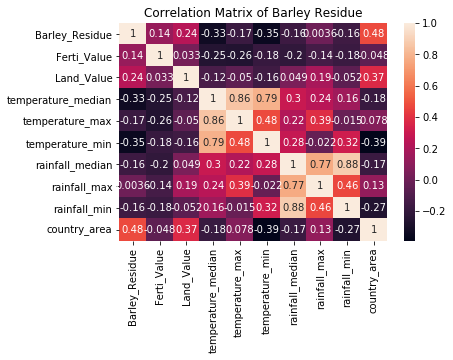

In [65]:
#do coefficient matrix
barley_df= pd.DataFrame(barley18_g4,columns=['Barley_Residue','Ferti_Value',"Land_Value","temperature_median",
                                             "temperature_max","temperature_min","rainfall_median","rainfall_max","rainfall_min","country_area"])
corrMatrix = barley_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation Matrix of Barley Residue")
plt.show()

In [66]:
barley_df

Barley_Residue  Ferti_Value    Land_Value  temperature_median  \
0      9.936675e+04     5.886300  1.683642e+04           13.870000   
1      1.689625e+04    35.587700  3.050629e+03           11.925000   
2      3.425322e+06     8.242300  4.104448e+04           25.150000   
3      6.644820e+05     0.160700  6.321889e+00           11.525000   
4      1.802236e+07    89.569450  7.308600e+01           13.430000   
5      3.632560e+04     4.207600  5.471118e+03           23.705000   
6      4.331250e+05     1.718000  2.234238e+02           11.660000   
7      4.331250e+05     1.718000  9.637889e+02           11.660000   
8      8.856871e+06    28.819900  2.791304e+04           15.820000   
9      2.172922e+05   178.534400  5.176354e-01            9.910000   
10     4.121985e+05    75.862800  2.283748e+01           20.968333   
11     1.619424e+07    45.078100  5.292192e+04           22.580000   
12     1.209302e+06    82.026800  2.626209e+03            7.180000   
13     1.603063e+06    50.547800  1.507304e+00           15.295000   
14     4.331250e+05    55.170000  4.484012e+03           26.305000   
15     1.492228e+05   133.814800  9.120147e+00           28.871667   
16     4.270000e+02   154.677200  2.890981e+05           26.020000   
17     4.331250e+05    28.772500  9.418846e+02           26.410000   
18     1.652597e+06    69.533700  1.187937e+06            8.260000   
19     5.672100e+05   195.020800  4.534621e+03           11.360000   
20     8.825862e+05    87.740800  1.965293e+03           25.925000   
21     3.632560e+04    14.135000  6.438529e+02           27.950000   
22     4.331250e+05    29.678975  7.123747e+02           11.660000   
23     1.625750e+03    28.193000  5.836707e+03            1.640000   
24     8.158500e+04     3.007600  5.671729e+02           25.360000   
25     1.383550e+05    61.516900  1.681345e+03           10.680000   
26     3.632560e+04    80.871600  1.105028e+04           23.350000   
27     5.781545e+05    80.603200  9.303840e+02           26.475000   
28     4.331250e+05     1.718000  3.285644e+02           17.050000   
29     2.275000e+05    56.211333  5.310090e+03           26.415000   
30     7.852250e+05    92.141300  3.176721e+04           12.850000   
31     3.632560e+04     9.287700  1.538492e+03           29.035000   
32     3.632560e+04     8.681700  4.214832e+04           20.645000   
33     3.632560e+04     7.898650  1.792156e+02           24.270000   
34     2.275000e+05    31.428500  1.057825e+05           27.680000   
35     3.632560e+04     6.001200  2.768010e+04           24.475000   
36     1.466448e+07    71.261300  1.080678e+06           -5.250000   
37     4.331250e+05    29.140500  8.528669e+01           26.531667   
38     3.632560e+04     0.045800  8.492785e+02           25.230000   
39     3.632560e+04     2.136167  3.334947e+04           28.440000   
40     2.986410e+05   157.139700  2.289441e+04            6.575000   
41     1.673875e+06    26.717367  8.573741e+04            7.380000   
42     1.673875e+06   136.449600  3.721593e+02           23.820000   
43     1.084611e+06   136.449600  1.103067e+01           23.958333   
44     1.750700e+04    57.141300  8.734155e+03           27.000000   
45     3.632560e+04    11.864867  2.071958e+02           24.210000   
46     3.632560e+04     0.522400  4.911415e+04           25.320000   
47     6.644820e+05     7.800000  7.586267e+00           11.525000   
48     5.868333e+03   165.170700  1.595451e+03           24.390000   
49     3.632560e+04     4.620800  4.096578e+04           27.851667   
50     4.027975e+05   113.493200  3.140858e+02           12.365000   
51     4.331250e+05    15.019500  3.549735e+04           25.490000   
52     1.386000e+04    60.093100  1.609996e-01           20.590000   
53     2.810552e+06   138.878800  6.280928e+03            9.830000   
54     3.850000e+04   119.969433  4.142699e+03            7.690000   
55     1.856750e+03     0.727100  7.752893e+03           25.200000   
56     6.029048

In [67]:
#do normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
barley_df_maxmin = pd.DataFrame(scaler.fit_transform(barley_df.values), columns=barley_df.columns, index=barley_df.index)

In [68]:
barley_df_maxmin

Barley_Residue  Ferti_Value    Land_Value  temperature_median  \
0          0.003340     0.017198  4.043341e-03            0.596246   
1          0.000567     0.103978  7.326165e-04            0.558217   
2          0.115190     0.024082  9.857020e-03            0.816795   
3          0.022345     0.000470  1.511711e-06            0.550396   
4          0.606081     0.261700  1.754543e-05            0.587643   
5          0.001220     0.012294  1.313909e-03            0.788542   
6          0.014564     0.005020  5.364977e-05            0.553035   
7          0.014564     0.005020  2.314520e-04            0.553035   
8          0.297851     0.084205  6.703443e-03            0.634373   
9          0.007306     0.521633  1.177916e-07            0.518819   
10         0.013860     0.221652  5.478007e-06            0.735034   
11         0.544603     0.131707  1.270944e-02            0.766546   
12         0.040667     0.239662  6.306901e-04            0.465441   
13         0.053909     0.147688  3.554653e-07            0.624108   
14         0.014564     0.161193  1.076850e-03            0.839378   
15         0.005017     0.390974  2.183726e-06            0.889562   
16         0.000013     0.451929  6.942829e-02            0.833806   
17         0.014564     0.084066  2.261916e-04            0.841431   
18         0.055574     0.203160  2.852886e-01            0.486558   
19         0.019073     0.569803  1.089004e-03            0.547170   
20         0.029679     0.256357  4.719681e-04            0.831948   
21         0.001220     0.041299  1.546178e-04            0.871542   
22         0.014564     0.086715  1.710736e-04            0.553035   
23         0.000053     0.082373  1.401707e-03            0.357122   
24         0.002742     0.008787  1.362027e-04            0.820901   
25         0.004651     0.179737  4.037765e-04            0.533874   
26         0.001220     0.236287  2.653771e-03            0.781601   
27         0.019441     0.235503  2.234296e-04            0.842702   
28         0.014564     0.005020  7.889978e-05            0.658422   
29         0.007649     0.164236  1.275237e-03            0.841529   
30         0.026405     0.269214  7.629040e-03            0.576303   
31         0.001220     0.027136  3.694697e-04            0.892756   
32         0.001220     0.025366  1.012211e-02            0.728712   
33         0.001220     0.023078  4.303295e-05            0.799589   
34         0.007649     0.091826  2.540416e-02            0.866263   
35         0.001220     0.017534  6.647501e-03            0.803598   
36         0.493157     0.208208  2.595300e-01            0.222407   
37         0.014564     0.085141  2.047548e-05            0.843810   
38         0.001220     0.000134  2.039517e-04            0.818360   
39         0.001220     0.006241  8.009027e-03            0.881122   
40         0.010042     0.459123  5.498195e-03            0.453612   
41         0.056290     0.078062  2.059024e-02            0.469352   
42         0.056290     0.398672  8.936929e-05            0.790791   
43         0.036473     0.398672  2.642546e-06            0.793496   
44         0.000587     0.166953  2.097542e-03            0.852967   
45         0.001220     0.034666  4.975254e-05            0.798416   
46         0.001220     0.001526  1.179499e-02            0.820119   
47         0.022345     0.022790  1.815357e-06            0.550396   
48         0.000196     0.482588  3.831487e-04            0.801936   
49         0.001220     0.013501  9.838120e-03            0.869619   
50         0.013544     0.331599  7.542268e-05            0.566820   
51         0.014564     0.043883  8.524851e-03            0.823443   
52         0.000464     0.175577  3.214384e-08            0.727637   
53         0.094516     0.405770  1.508388e-03            0.517255   
54         0.001293     0.350521  9.948823e-04            0.475413   
55         0.000061     0.002124  1.861888e-03            0.817773   
56         0.20

In [69]:
#X=barley_df[['Ferti_Value',"temperature_max","temperature_median","rainfall_median","rainfall_max","rainfall_min"]]"temperature_min"
X=barley_df[['Ferti_Value',"country_area","temperature_max",'temperature_median',"rainfall_min","temperature_min","rainfall_median"]]
y=barley_df[['Barley_Residue']]

In [70]:
#X_scaled=barley_df_maxmin[['Ferti_Value',"temperature_max","temperature_median","temperature_min","rainfall_median","rainfall_max","rainfall_min"]]
#y_scaled=barley_df_maxmin[['Barley_Residue']]

In [71]:
#split training and test set
#X_train, X_test, y_train, y_test = model_select.train_test_split(X, y, test_size=0.1,random_state=0)

In [72]:
#X_trains, X_tests, y_trains, y_tests = model_select.train_test_split(X_scaled, y_scaled, test_size=0.1,random_state=0)

In [73]:
#OLS model
import statsmodels.api as sm
y = np.array(y) # define output/dependant variable
#X_train = sm.add_constant(X_train)
# Note the difference in argument order
lm = sm.OLS(y, X).fit()
#redictions = model.predict(X_train)
#predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.397
Model:                            OLS   Adj. R-squared (uncentered):              0.378
Method:                 Least Squares   F-statistic:                              20.67
Date:                Fri, 03 Sep 2021   Prob (F-statistic):                    2.92e-21
Time:                        02:48:49   Log-Likelihood:                         -3735.1
No. Observations:                 227   AIC:                                      7484.
Df Residuals:                     220   BIC:                                      7508.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Ferti_Value         1.398e+04   3972.377      3.520      0.001    6152.075    2.18e+04
country_area           1.0009      0.150      6.684      0.000       0.706       1.296
temperature_max     1.995e+05   6.88e+04      2.900      0.004    6.39e+04    3.35e+05
temperature_median -2.602e+05   9.89e+04     -2.631      0.009   -4.55e+05   -6.53e+04
rainfall_min        1491.6881    785.495      1.899      0.059     -56.371    3039.747
temperature_min     3.867e+04   4.44e+04      0.872      0.384   -4.87e+04    1.26e+05
rainfall_median     -968.0112    696.272     -1.390      0.166   -2340.229     404.206
==============================================================================
Omnibus:                      150.626   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1241.002
Skew:                           2.578   Prob(JB):                    3.31e-270
Kurtosis:                      13.229   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#y = np.array(y) # define output/dependant variable
# Note the difference in argument order
#lm1 = sm.OLS(y, X).fit()
#lm1.summary()
#evaluation
lm_pre_y = lm.predict(X)
print("Ordinary Least Square model:")
#MAE
#print("mean absolute error:", metrics.mean_absolute_error(y_test.values,lm_pre_y.values))
#MSE
print("root mean squared error:", sqrt(metrics.mean_squared_error(y,lm_pre_y.values)))
#RMSE
#mse_test = np.sum((lm_pre_y.values  - y_test.values) ** 2)/len(y_test)
#rmse_test = sqrt(mse_test)
#print("Root mean squared error:",sqrt(metrics.mean_squared_error(y_test.values,lm_pre_y.values)))

Ordinary Least Square model:
root mean squared error: 3386486.1818361743


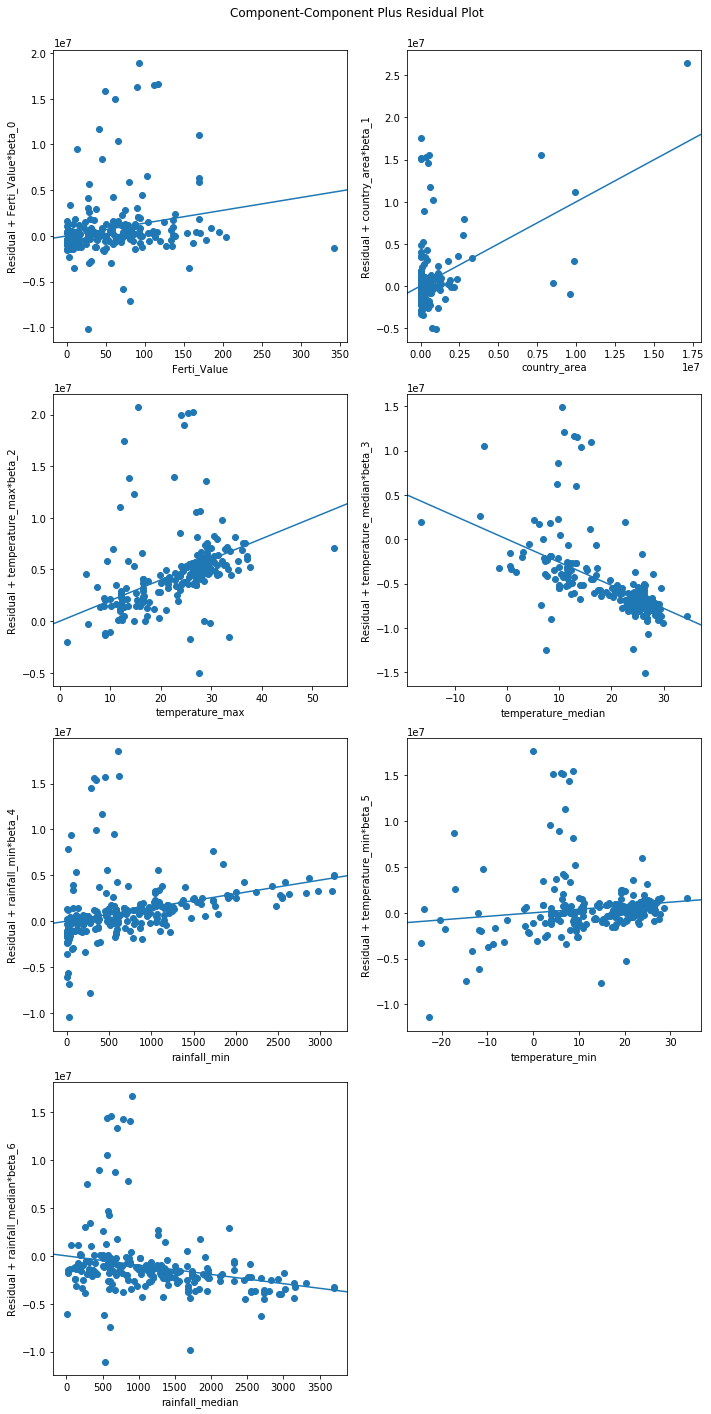

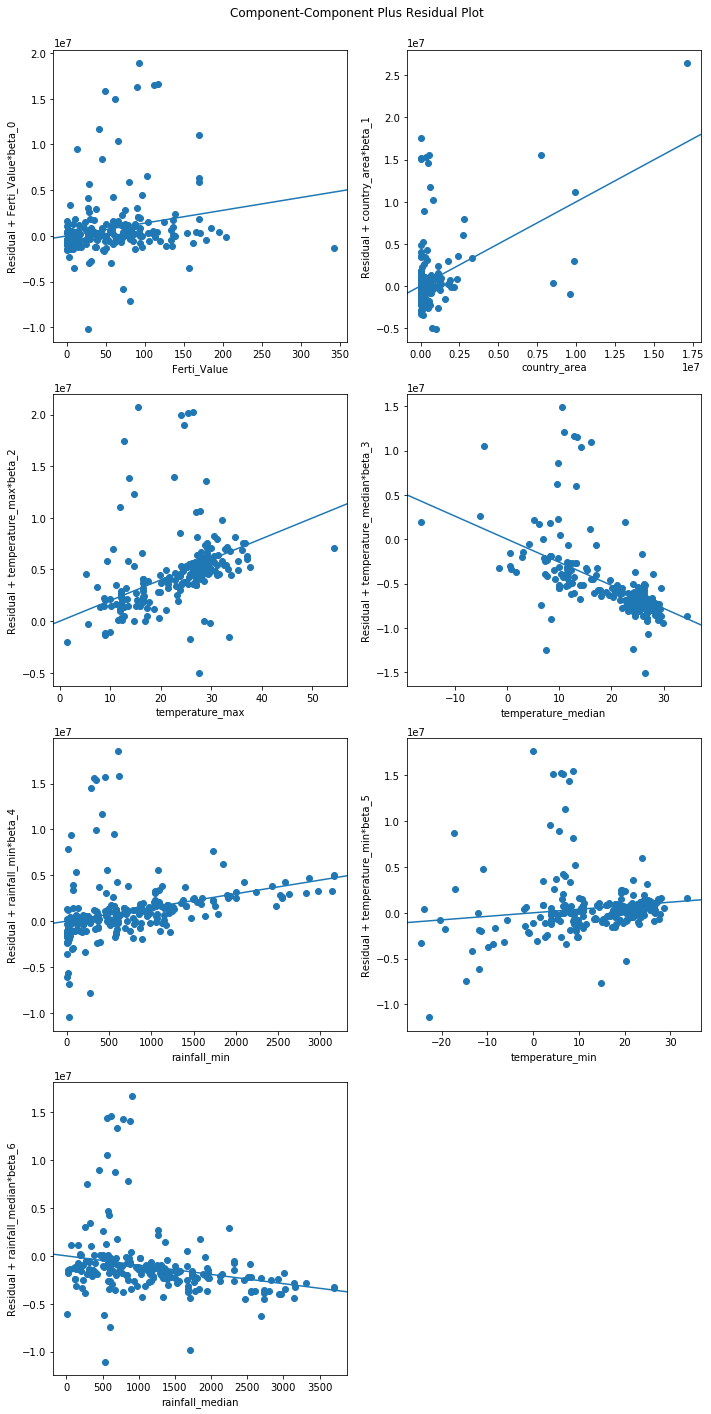

In [75]:
fig=plt.figure(figsize=(10,20))
sm.graphics.plot_ccpr_grid(lm,fig=fig)

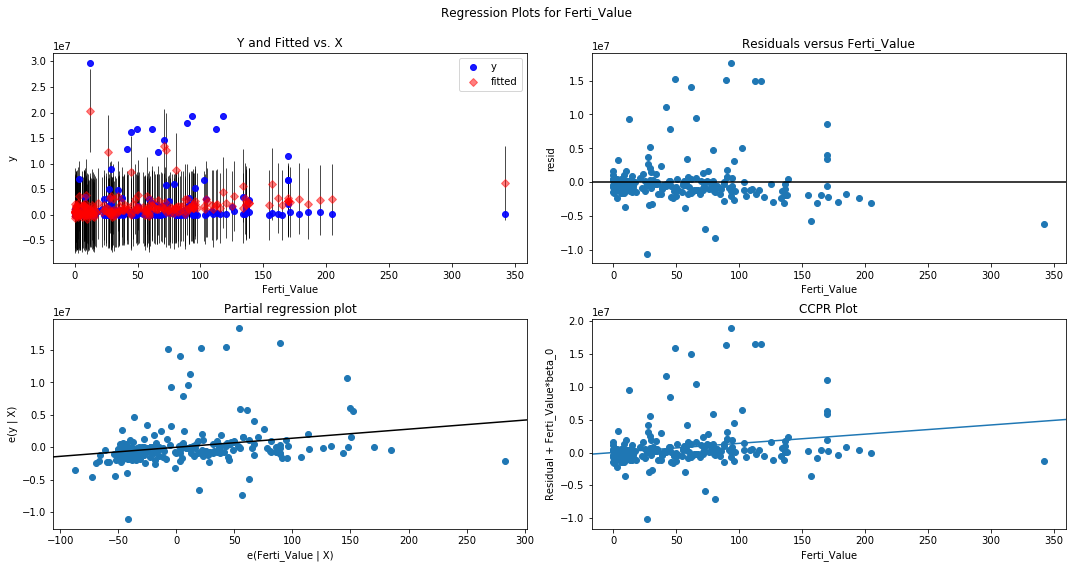

In [76]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lm,"Ferti_Value", fig =fig)

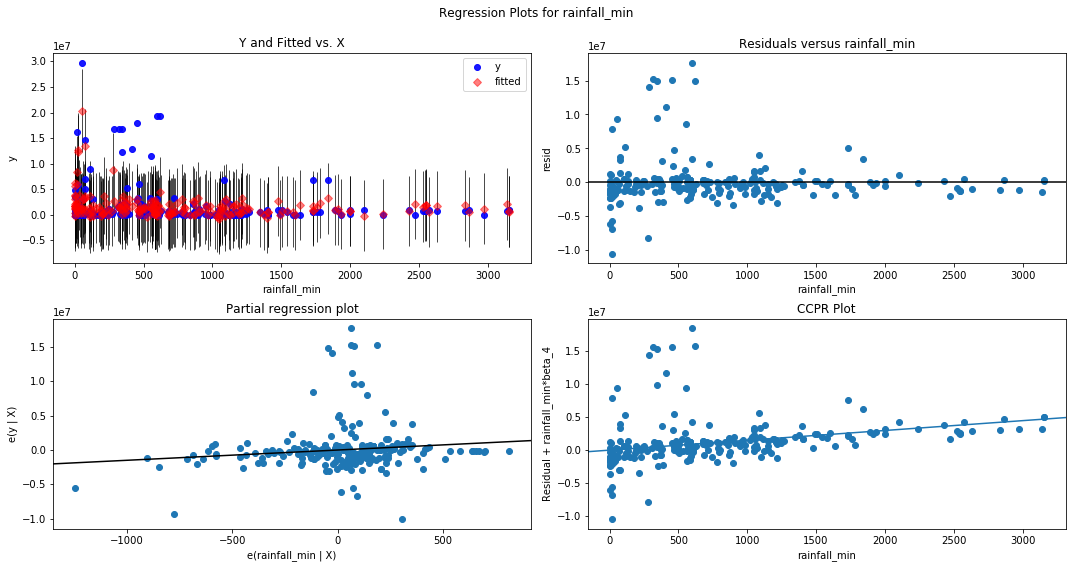

In [77]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lm,"rainfall_min", fig =fig)

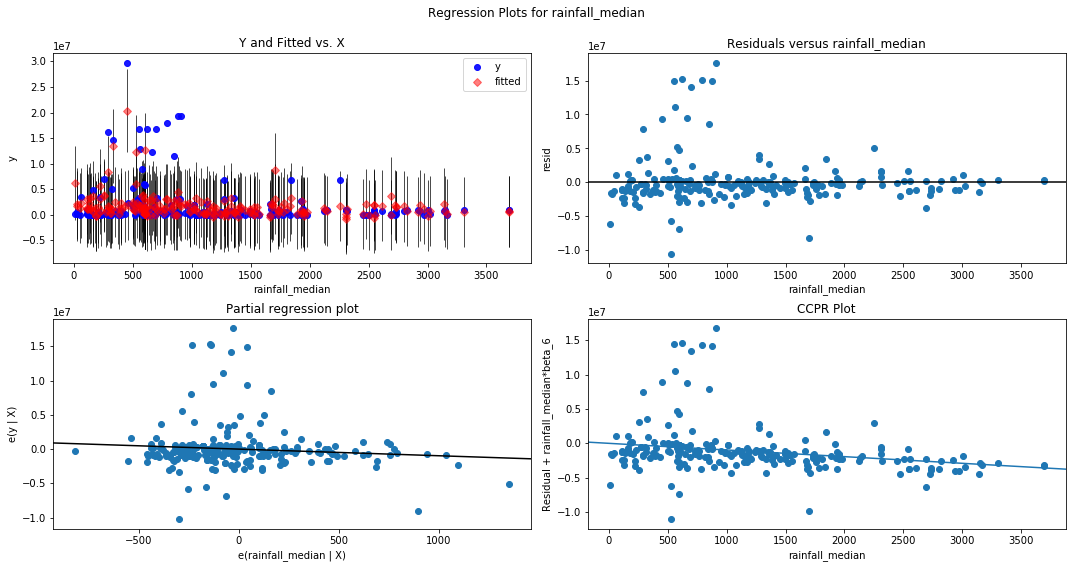

In [79]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lm,"rainfall_median", fig =fig)

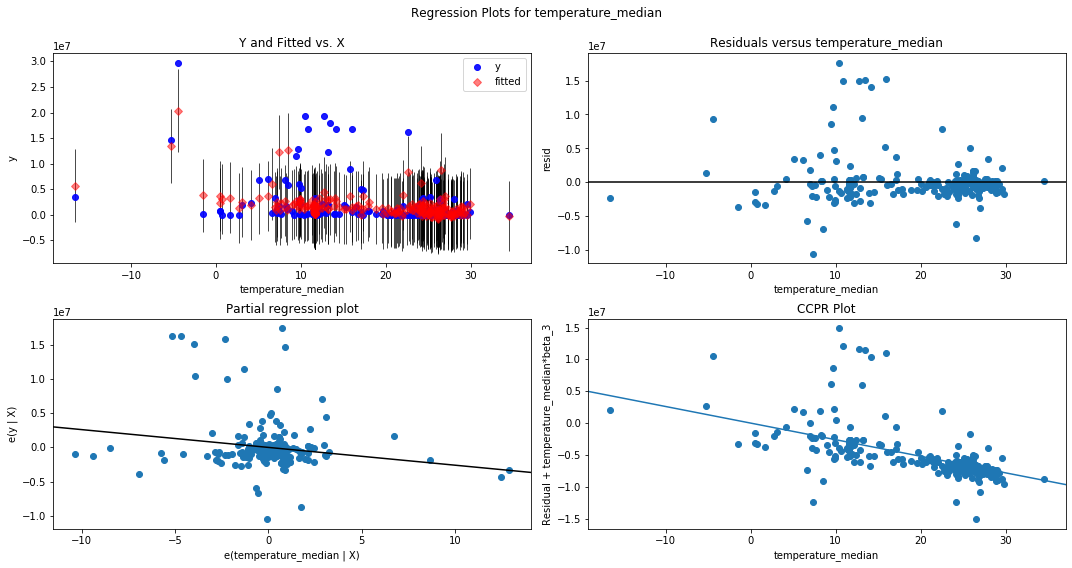

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lm,"temperature_median", fig =fig)

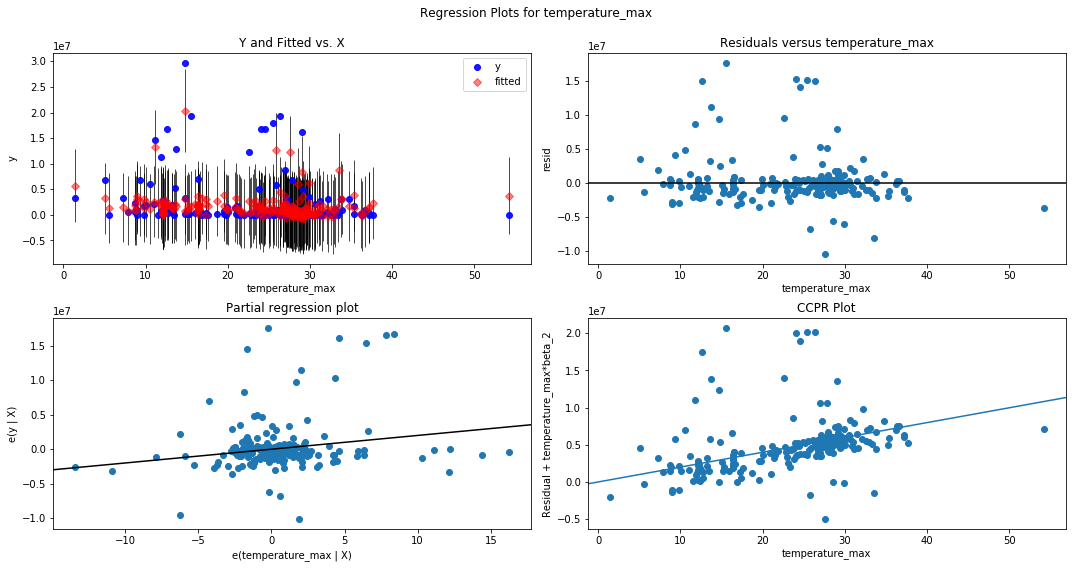

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lm,"temperature_max", fig =fig)

In [82]:
## 
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
## 
"""
plt.figure()
plt.plot(mlpr.loss_curve_)
plt.xlabel("iters")
plt.ylabel(mlpr.loss)
plt.show()
"""

C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


'\nplt.figure()\nplt.plot(mlpr.loss_curve_)\nplt.xlabel("iters")\nplt.ylabel(mlpr.loss)\nplt.show()\n'

In [83]:
## prediction on test set
mlp_pre_y =regr.predict(X)
#mlp_pre_y1= regr.predict(X_train)
#print("mean absolute error:", metrics.mean_absolute_error(y,mlp_pre_y))
print("root mean squared error:", sqrt(metrics.mean_squared_error(y,mlp_pre_y)))
## 输出在测试集上的R^2
print("R^2 :",regr.score(X,y))

root mean squared error: 3684167.593257937
R^2 : 0.15974473840086423


In [84]:
#mlp_pre_y

In [85]:
#lasso regression
from sklearn import linear_model
lasso=linear_model.Lasso()
lasso.fit(X,y)
lasso_pred=lasso.predict(X)
RMSE=np.sqrt(mean_squared_error(y,lasso_pred))
print("RMSE:",RMSE)

RMSE: 3346590.6969501176


In [86]:
lasso.score(X, y, sample_weight=None)

0.30667368605089096

In [87]:
barley_dfg= gpd.GeoDataFrame(barley18_g4,columns=['Barley_Residue','Ferti_Value',"Land_Value","temperature_median",
                                             "temperature_max","temperature_min","rainfall_median","rainfall_max","rainfall_min","country_area","geometry"])

In [88]:
w_queeng = Queen.from_dataframe(barley_dfg)

C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 72 disconnected components.
 There are 69 islands with ids: 3, 6, 7, 10, 11, 14, 15, 17, 22, 28, 33, 37, 43, 45, 47, 51, 52, 58, 68, 69, 70, 73, 81, 82, 83, 92, 98, 101, 102, 106, 118, 121, 123, 124, 126, 128, 132, 137, 139, 140, 141, 143, 144, 145, 149, 150, 152, 156, 162, 163, 166, 173, 174, 175, 176, 177, 178, 180, 184, 186, 189, 194, 204, 205, 209, 210, 217, 220, 223.
  warnings.warn(message)


In [89]:
#spatial lag model
X_lag=barley_df[['Ferti_Value',"country_area","temperature_max",'temperature_median',"temperature_min","rainfall_min","rainfall_median"]]
y_lag=barley_df[['Barley_Residue']]

In [90]:
y_lag=np.array(y_lag.values)
y_lag.shape = (len(y_lag),1)

In [91]:
X_lag= []
X_lag.append(barley_df["Ferti_Value"].values)
X_lag.append(barley_df["country_area"].values) 
X_lag.append(barley_df["temperature_max"].values) 
X_lag.append(barley_df["temperature_median"].values) 
X_lag.append(barley_df["temperature_min"].values)
X_lag.append(barley_df["rainfall_min"].values)
X_lag.append(barley_df["rainfall_median"].values)
X_lag = np.array(X_lag).T

In [92]:
w_queeng[1]

{80: 1.0, 131: 1.0, 151: 1.0}

In [93]:
X_lag

array([[ 5.886300e+00,  6.528600e+05,  2.680000e+01, ..., -1.147000e+01,
         4.300000e+00,  4.304000e+02],
       [ 3.558770e+01,  2.875000e+04,  1.765000e+01, ...,  1.001000e+01,
         9.815000e+02,  1.146900e+03],
       [ 8.242300e+00,  2.381741e+06,  2.987000e+01, ...,  1.059000e+01,
         9.100000e+00,  5.940000e+01],
       ...,
       [ 2.610200e+00,  5.279700e+05,  3.771000e+01, ...,  1.797000e+01,
         1.360000e+01,  1.258000e+02],
       [ 3.857810e+01,  7.526100e+05,  2.568000e+01, ...,  1.830000e+01,
         4.893000e+02,  1.034700e+03],
       [ 1.585370e+01,  3.907600e+05,  2.585000e+01, ...,  1.738000e+01,
         2.728000e+02,  5.831000e+02]])

In [94]:
from pysal.model.spreg import ols
from pysal.model.spreg import ML_Error
from pysal.model.spreg import ML_Lag

spat_lag = ML_Lag(y_lag,X_lag,w_queeng,name_y='Barley_Residue', 
                  name_x=['Ferti_Value',"country_area","temperature_max",'temperature_median',"temperature_min","rainfall_min","rainfall_median"],
                  name_w='w_queeng', name_ds='Barley_Residue')
print(spat_lag.summary)

C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\pysal\model\spreg\user_output.py:456: UserWarning: w must be API-compatible pysal weights object
  warn("w must be API-compatible pysal weights object")
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :Barley_Residue
Weights matrix      :    w_queeng
Dependent Variable  :Barley_Residue                Number of Observations:         227
Mean dependent var  :1690286.3958                Number of Variables   :           9
S.D. dependent var  :4028027.8700                Degrees of Freedom    :         218
Pseudo R-squared    :      0.3802
Spatial Pseudo R-squared:  0.2867
Sigma-square ML     :10019587783415.217                Log likelihood        :   -3721.879
S.E of regression   : 3165373.246                Akaike info criterion :    7461.757
                                                 Schwarz criterion     :    7492.582

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------

In [95]:
from sklearn.metrics import mean_squared_error as mse
mse(y, spat_lag.predy.flatten())

10019587783415.217

In [96]:
spat_err = ML_Error(y_lag,X_lag,w_queeng, name_y='Barley_Residue', 
                  name_x=['Ferti_Value',"country_area","temperature_max",'temperature_median',"temperature_min","rainfall_min","rainfall_median"],
                  name_w='w_queeng', name_ds='Barley_Residue')
print(spat_err.summary)

C:\Users\viki\anaconda3\envs\cusplondon\lib\site-packages\pysal\model\spreg\user_output.py:456: UserWarning: w must be API-compatible pysal weights object
  warn("w must be API-compatible pysal weights object")
C:\Users\viki\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :Barley_Residue
Weights matrix      :    w_queeng
Dependent Variable  :Barley_Residue                Number of Observations:         227
Mean dependent var  :1690286.3958                Number of Variables   :           8
S.D. dependent var  :4028027.8700                Degrees of Freedom    :         219
Pseudo R-squared    :      0.2525
Sigma-square ML     :8875888617765.270                Log likelihood        :   -3713.243
S.E of regression   : 2979242.961                Akaike info criterion :    7442.486
                                                 Schwarz criterion     :    7469.886

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
--------------------------------------------------

In [97]:
sqrt(mse(y, spat_err.predy.flatten()))

3495292.0028138524

In [98]:
#projection for 2030
#add temperature change
barley_dfg["temperature_median_2030"]=barley_dfg["temperature_median"]+0.597
barley_dfg["temperature_min_2030"]=barley_dfg["temperature_min"]+0.597
barley_dfg["temperature_max_2030"]=barley_dfg["temperature_max"]+0.597

In [99]:
X_2030=barley_dfg[['Ferti_Value',"country_area","temperature_max_2030","temperature_median_2030","temperature_min_2030","rainfall_min","rainfall_median"]]

In [100]:
y_pre_2030=lasso.predict(X_2030)

In [101]:
for i in range(0,len(y_pre_2030)):
    if y_pre_2030[i]<0:
         y_pre_2030[i]=(-1)* y_pre_2030[i]

In [102]:
barley_dfg["Barley_Residue_2030"]=y_pre_2030

Text(0.5, 1, 'Barley Residue Quantity (2030)')

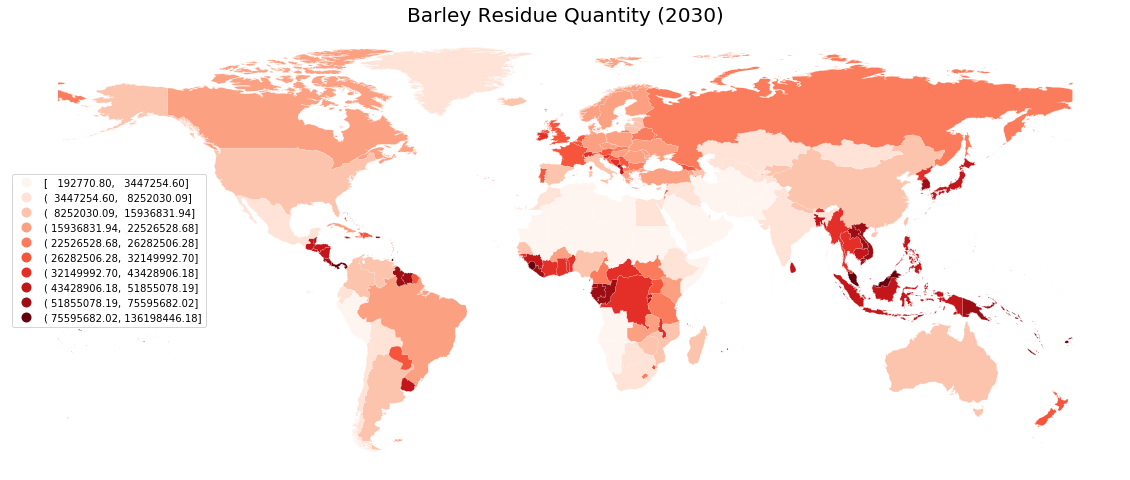

In [103]:
#visualize
fig, ax = plt.subplots(figsize=(20, 15))
barley_dfg.plot(column='Barley_Residue_2030',scheme='quantiles',k=10, 
         cmap=plt.cm.Reds, alpha=1, legend=True,legend_kwds=dict(loc='center left'),
         edgecolor='w', linewidth=0.1,ax=ax,               
       )
ax.set_axis_off()
ax.set_title("Barley Residue Quantity (2030)", fontsize=20)

In [104]:
#project#projection for 2040
#add temperature change
#add temperature change
barley_dfg["temperature_median_2040"]=barley_dfg["temperature_median"]+0.851
barley_dfg["temperature_min_2040"]=barley_dfg["temperature_min"]+0.851
barley_dfg["temperature_max_2040"]=barley_dfg["temperature_max"]+0.851

In [105]:
X_2040=barley_dfg[['Ferti_Value',"country_area","temperature_max_2040","temperature_median_2040","temperature_min_2040","rainfall_min","rainfall_median"]]

In [106]:
y_pre_2040=lasso.predict(X_2040)

In [107]:
for i in range(0,len(y_pre_2040)):
    if y_pre_2040[i]<0:
         y_pre_2040[i]=(-1)* y_pre_2040[i]

In [108]:
barley_dfg["Barley_Residue_2040"]=y_pre_2040

Text(0.5, 1, 'Barley Residue Quantity (2040)')

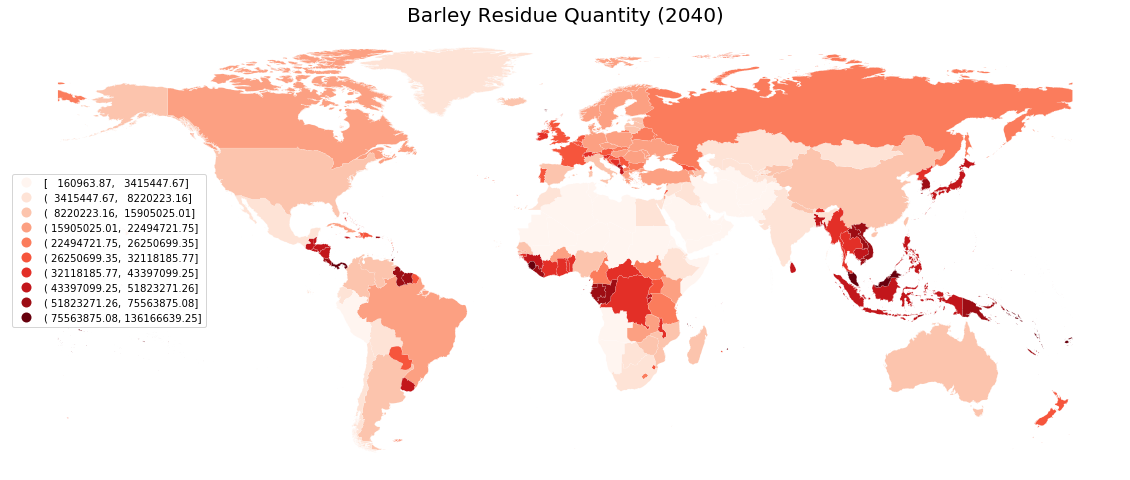

In [109]:
#visualize
fig, ax = plt.subplots(figsize=(20, 15))
barley_dfg.plot(column='Barley_Residue_2040',scheme='quantiles',k=10, 
         cmap=plt.cm.Reds, alpha=1, legend=True,legend_kwds=dict(loc='center left'),
         edgecolor='w', linewidth=0.1,ax=ax,               
       )
ax.set_axis_off()
ax.set_title("Barley Residue Quantity (2040)", fontsize=20)

In [110]:
#2030
#Cellulose
barley_dfg["Cellulose_2030"]=barley_dfg["Barley_Residue_2030"]*0.41
#Hemicellulose
barley_dfg["Hemicellulose_2030"]=barley_dfg["Barley_Residue_2030"]*0.21
#lignin
barley_dfg["Lignin_2030"]=barley_dfg["Barley_Residue_2030"]*0.35

In [111]:
#2040
#Cellulose
barley_dfg["Cellulose_2040"]=barley_dfg["Barley_Residue_2030"]*0.41
#Hemicellulose
barley_dfg["Hemicellulose_2040"]=barley_dfg["Barley_Residue_2030"]*0.21
#lignin
barley_dfg["Lignin_2040"]=barley_dfg["Barley_Residue_2030"]*0.35

In [112]:
barley_dfg["Country Code"]=barley18_g3['Country Code']

In [113]:
barley_dfg.to_csv("dataset/protein/barley_protein.csv",columns=["Cellulose_2030","Hemicellulose_2030","Lignin_2030",
                                                                 "Cellulose_2040","Hemicellulose_2040","Lignin_2040",
                                                                 "Country Code"])

In [114]:
diff_2040=barley_dfg["Barley_Residue_2040"]-barley_dfg["Barley_Residue"]

In [115]:
diff_2040

0      2.199113e+06
1      4.354411e+07
2     -1.276030e+06
3      8.236974e+07
4      3.647692e+06
5      1.246383e+05
6      2.530911e+07
7      2.530944e+07
8     -8.086790e+03
9      1.931438e+07
10     2.343408e+07
11    -7.726730e+06
12     2.550981e+07
13     1.407092e+07
14     3.787752e+07
15     3.854872e+06
16     4.825621e+07
17     7.292537e+07
18     2.190577e+07
19     2.692651e+07
20     4.391438e+07
21     3.299544e+07
22     2.555191e+07
23     4.210460e+07
24     4.653748e+06
25     3.912748e+07
26     8.080433e+06
27     1.899517e+07
28     2.864218e+07
29     5.754707e+07
30     2.367165e+07
31     1.879597e+07
32     5.148822e+07
33     7.168935e+06
34     4.540844e+07
35     2.460042e+07
36     3.290154e+06
37     3.599827e+07
38     4.166892e+07
39     6.405457e+05
40     5.869785e+06
41     1.190007e+07
42     3.960992e+07
43     5.129000e+07
44     1.084221e+07
45     1.267313e+08
46     5.953535e+07
47     1.100589e+08
48     7.040182e+07
49     4.038027e+07


In [116]:
diff_2030=barley_dfg["Barley_Residue_2030"]-barley_dfg["Barley_Residue"]

In [117]:
#value in 2030 larger than the value in 2040
diff_2030 = np.array(diff_2030.values>0 ).sum()
diff_2030 

219

In [118]:
diff_2040 = np.array(diff_2040.values>0 ).sum()
diff_2040 

217